# Example - Kmeans clustering

---

Customer Personality Analysis involves a thorough examination of a company's optimal customer profiles. This analysis facilitates a deeper understanding of customers, enabling businesses to tailor products to meet the distinct needs, behaviors, and concerns of various customer types.

By conducting a Customer Personality Analysis, businesses can refine their products based on the preferences of specific customer segments. Rather than allocating resources to market a new product to the entire customer database, companies can identify the segments most likely to be interested in the product. Subsequently, targeted marketing efforts can be directed toward those particular segments, optimizing resource utilization and increasing the likelihood of successful product adoption.

### License: Apache 2.0
### Source link: https://www.kaggle.com/datasets/vishakhdapat/customer-segmentation-clustering/data

## Customer Marketing Dataset – Feature Descriptions

- **Id**: Unique identifier for each individual in the dataset.
- **Year_Birth**: The birth year of the individual.
- **Education**: The highest level of education attained by the individual.
- **Marital_Status**: The marital status of the individual.
- **Income**: The annual income of the individual.
- **Kidhome**: The number of young children in the household.
- **Teenhome**: The number of teenagers in the household.
- **Dt_Customer**: The date when the customer was first enrolled or became a part of the company's database.
- **Recency**: The number of days since the last purchase or interaction.
- **MntWines**: The amount spent on wines.
- **MntFruits**: The amount spent on fruits.
- **MntMeatProducts**: The amount spent on meat products.
- **MntFishProducts**: The amount spent on fish products.
- **MntSweetProducts**: The amount spent on sweet products.
- **MntGoldProds**: The amount spent on gold products.
- **NumDealsPurchases**: The number of purchases made with a discount or as part of a deal.
- **NumWebPurchases**: The number of purchases made through the company's website.
- **NumCatalogPurchases**: The number of purchases made through catalogs.
- **NumStorePurchases**: The number of purchases made in physical stores.
- **NumWebVisitsMonth**: The number of visits to the company's website in a month.
- **AcceptedCmp3**: Binary indicator (1 or 0) whether the individual accepted the third marketing campaign.
- **AcceptedCmp4**: Binary indicator (1 or 0) whether the individual accepted the fourth marketing campaign.
- **AcceptedCmp5**: Binary indicator (1 or 0) whether the individual accepted the fifth marketing campaign.
- **AcceptedCmp1**: Binary indicator (1 or 0) whether the individual accepted the first marketing campaign.
- **AcceptedCmp2**: Binary indicator (1 or 0) whether the individual accepted the second marketing campaign.
- **Complain**: Binary indicator (1 or 0) whether the individual has made a complaint.
- **Z_CostContact**: A constant cost associated with contacting a customer.
- **Z_Revenue**: A constant revenue associated with a successful campaign response.
- **Response**: Binary indicator (1 or 0) whether the individual responded to the marketing campaign.


In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
import time

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### 1. Data overview

---

In [261]:
data = pd.read_csv('data/customer_segmentation.csv')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [262]:
df = data.copy()

In [263]:
df.shape

(2240, 29)

In [264]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [265]:
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [266]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [267]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [268]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

### 2. Preprocessing 

---

In [269]:
def ohe_data(dataset: pd.DataFrame, feature: str) -> pd.DataFrame:
    """
    Encode a categorical feature using One-Hot Encoding (drop='first').
    
    :param dataset: Main dataset that contains the feature.
    :param feature: The name of the feature to be one-hot encoded.
    :return: A DataFrame with the encoded columns ready to be merged with the main dataset.
    """
    enc  = OneHotEncoder(sparse_output=False, drop='first')
    encoded = enc.fit_transform(dataset[[feature]])
    encoded_df = pd.DataFrame(encoded, columns=enc.get_feature_names_out([feature]))
    
    return encoded_df

In [270]:
def concat_to_main_dataset(dataset: pd.DataFrame, encoded_data: pd.DataFrame, feature: str) -> pd.DataFrame:
    """
    Join the encoded columns to the main dataset and remove the original feature.
    
    :param dataset: The main dataset to update.
    :param encoded_data: The one-hot encoded DataFrame returned by ohe_data().
    :param feature: The original feature name to be removed.
    :return: The updated dataset with encoded columns and without the original feature.
    """
    dataset = dataset.join(encoded_data)
    dataset = dataset.drop(columns=[feature])
    
    return dataset

In [271]:
for f in ['Education', 'Marital_Status']:
    encoded_d = ohe_data(df, f)
    df = concat_to_main_dataset(df, encoded_d, f)

In [272]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")
df['account_days'] = (pd.Timestamp.now() - df['Dt_Customer']).dt.days

In [273]:
df['customer_age'] = (pd.Timestamp.now().year - df['Year_Birth'])

In [274]:
def drop_columns(dataset: pd.DataFrame, column: str) -> pd.DataFrame:
    """
    Remove a feature from the dataset.

    :param dataset: The DataFrame to update.
    :param column: The name of the column to remove.
    :return: The updated DataFrame without the specified column.
    """
    dataset = dataset.drop(columns=[column])
    
    return dataset

list_of_columns = ['Dt_Customer', 'Year_Birth']
for x in list_of_columns:
    df = drop_columns(df, x)

### 3. Scaling

---

In [275]:
df

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,account_days,customer_age
0,5524,58138.0,0,0,58,635,88,546,172,88,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4832,68
1,2174,46344.0,1,1,38,11,1,6,2,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4282,71
2,4141,71613.0,0,0,26,426,49,127,111,21,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4481,60
3,6182,26646.0,1,0,26,11,4,20,10,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4308,41
4,5324,58293.0,1,0,94,173,43,118,46,27,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4330,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,61223.0,0,1,46,709,43,182,42,118,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4550,58
2236,4001,64014.0,2,1,56,406,0,30,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4188,79
2237,7270,56981.0,0,0,91,908,48,217,32,12,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4324,44
2238,8235,69245.0,0,1,8,428,30,214,80,30,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4325,69


In [276]:
CUSTOMER_ID = df['ID']
df = drop_columns(df, 'ID')

In [277]:
df_scaling = df.copy()

In [278]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_scaling)
scaled_df = pd.DataFrame(scaled_data, columns=df_scaling.columns, index=df_scaling.index)
scaled_df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,account_days,customer_age
0,0.235327,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,...,-0.526385,-0.036621,-0.339909,-0.792406,1.914854,-0.591099,-0.188676,-0.029894,1.531185,0.985345
1,-0.235826,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,...,-0.526385,-0.036621,-0.339909,-0.792406,1.914854,-0.591099,-0.188676,-0.029894,-1.190545,1.235733
2,0.773633,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,...,-0.526385,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894,-0.205773,0.317643
3,-1.022732,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,...,-0.526385,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894,-1.061881,-1.268149
4,0.241519,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,...,1.899751,-0.036621,-0.339909,1.261980,-0.522233,-0.591099,-0.188676,-0.029894,-0.953012,-1.017761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.358568,-0.825218,0.906934,-0.107383,1.203678,0.419916,0.066692,0.081926,2.203398,3.891766,...,-0.526385,-0.036621,-0.339909,1.261980,-0.522233,-0.591099,-0.188676,-0.029894,0.135680,0.150717
2236,0.470064,2.890335,0.906934,0.237969,0.303291,-0.661449,-0.606873,-0.687068,-0.655733,-0.690659,...,1.899751,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894,-1.655713,1.903435
2237,0.189106,-0.825218,-0.929894,1.446700,1.795020,0.545656,0.221789,-0.101168,-0.364974,-0.383886,...,-0.526385,-0.036621,2.941967,-0.792406,-0.522233,-0.591099,-0.188676,-0.029894,-0.982703,-1.017761
2238,0.679035,-0.825218,0.906934,-1.419719,0.368666,0.092992,0.208495,0.777683,0.071165,0.325527,...,-0.526385,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894,-0.977755,1.068807


### 4. PCA

---

In [279]:
pca_data = PCA(
    n_components=2
)

pca_df = pca_data.fit_transform(scaled_df)
pca_df

array([[ 3.85523916, -0.57762007],
       [-2.37687717, -0.68331495],
       [ 1.64172672, -0.44872631],
       ...,
       [ 1.47846678, -0.08605411],
       [ 1.67462698,  1.15887076],
       [-1.62349024,  1.88818724]], shape=(2240, 2))

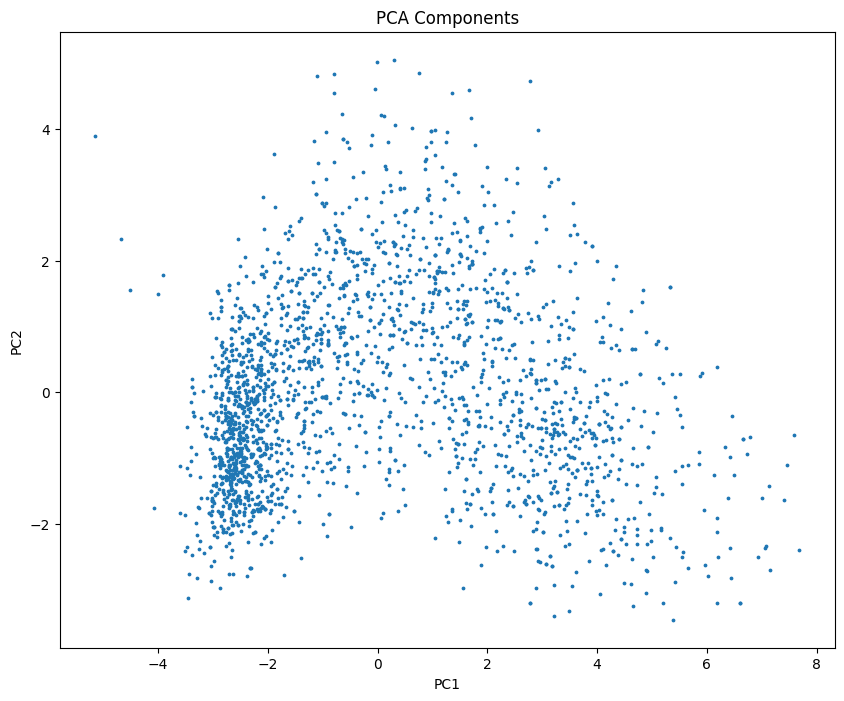

In [280]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_df[:, 0], pca_df[:, 1], s=3)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Components')
plt.show()

### 5. K-means Clustering

---

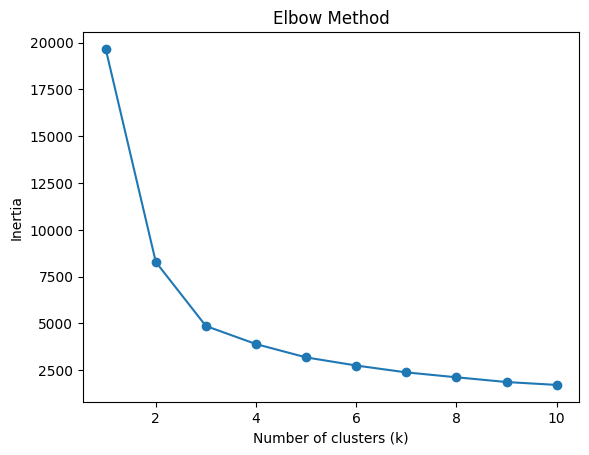

In [281]:
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(pca_df)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

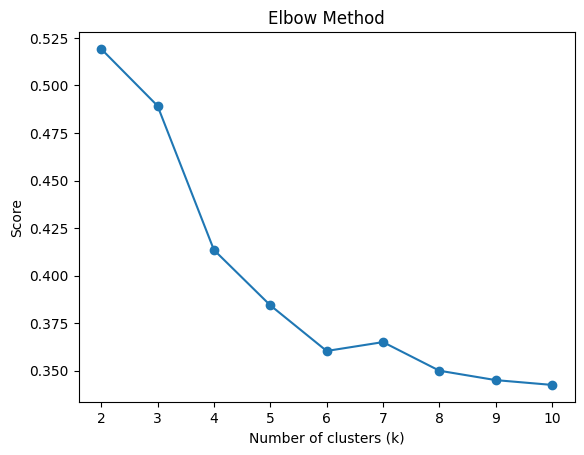

In [282]:
score_data = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(pca_df)
    score = silhouette_score(pca_df, labels)
    score_data.append(score)

plt.plot(range(2, 11), score_data, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

In [283]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(pca_df)

df['cluster'] = labels

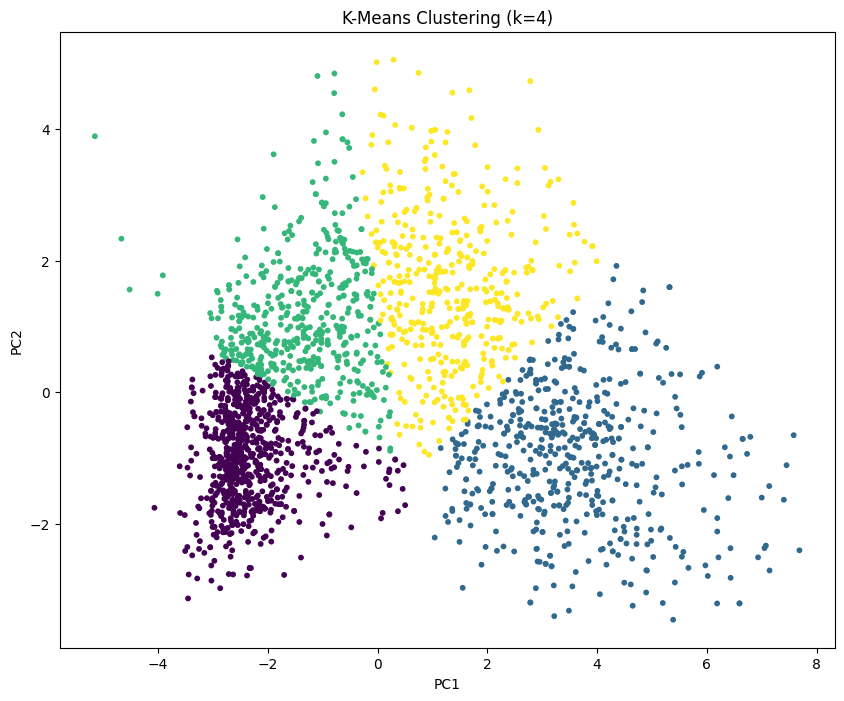

In [284]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_df[:, 0], pca_df[:, 1], c=labels, cmap='viridis', s=10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'K-Means Clustering (k={k})')
plt.show()

### 6. Cluster Profiling

---

In [285]:
cluster_profiling = pd.concat([CUSTOMER_ID, df], axis=1)
cluster_profiling

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,account_days,customer_age,cluster
0,5524,58138.0,0,0,58,635,88,546,172,88,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4832,68,1
1,2174,46344.0,1,1,38,11,1,6,2,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4282,71,0
2,4141,71613.0,0,0,26,426,49,127,111,21,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4481,60,1
3,6182,26646.0,1,0,26,11,4,20,10,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4308,41,0
4,5324,58293.0,1,0,94,173,43,118,46,27,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4330,44,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,61223.0,0,1,46,709,43,182,42,118,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4550,58,3
2236,4001,64014.0,2,1,56,406,0,30,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4188,79,2
2237,7270,56981.0,0,0,91,908,48,217,32,12,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4324,44,3
2238,8235,69245.0,0,1,8,428,30,214,80,30,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4325,69,3


In [286]:
profile_mean = cluster_profiling.groupby('cluster').mean()

In [287]:
profile_mean

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,account_days,customer_age
cluster,,,,,,,,,,,,,,,,,,,,,
0,5614.535854,32425.762078,0.831812,0.281617,49.425033,27.473272,5.623207,20.895698,8.035202,5.555411,...,0.105606,0.001304,0.079531,0.395046,0.277705,0.235984,0.010430,0.000000,4479.165580,50.160365
1,5598.691871,77624.359654,0.041588,0.132325,49.336484,597.459357,70.672968,470.364839,103.338374,72.637051,...,0.172023,0.000000,0.083176,0.361059,0.257089,0.251418,0.043478,0.000000,4520.162571,55.862004
2,5588.750491,46482.189603,0.561886,0.905697,48.133595,167.946955,7.744597,55.253438,11.852652,7.444008,...,0.318271,0.003929,0.121807,0.387033,0.137525,0.302554,0.043222,0.003929,4546.624754,61.003929
3,5548.751724,63081.753458,0.112644,0.889655,49.418391,593.570115,30.519540,186.193103,39.528736,32.519540,...,0.349425,0.000000,0.149425,0.397701,0.140230,0.257471,0.055172,0.000000,4573.944828,61.609195


In [288]:
def cluster_profile(dataset, feature):
    plt.figure(figsize=(9, 5))

    for cluster in dataset.index:
        value = dataset.loc[cluster, feature]

        plt.bar(cluster, value, label=f'Cluster {cluster}')

        plt.text(cluster,
                 value / 2,
                 f'{value:.0f}',
                 ha='center',
                 va='center',
                 color='white',
                 fontsize=10)

    plt.xlabel('Cluster')
    plt.ylabel(f'Average {feature}')
    plt.title(f'Average {feature} per Cluster')
    plt.xticks(dataset.index)
    plt.legend()
    plt.show()

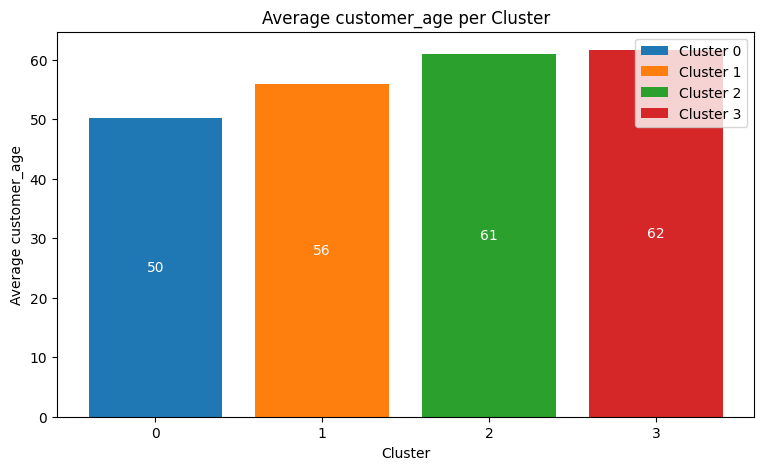

In [290]:
cluster_profile(profile_mean, 'customer_age')

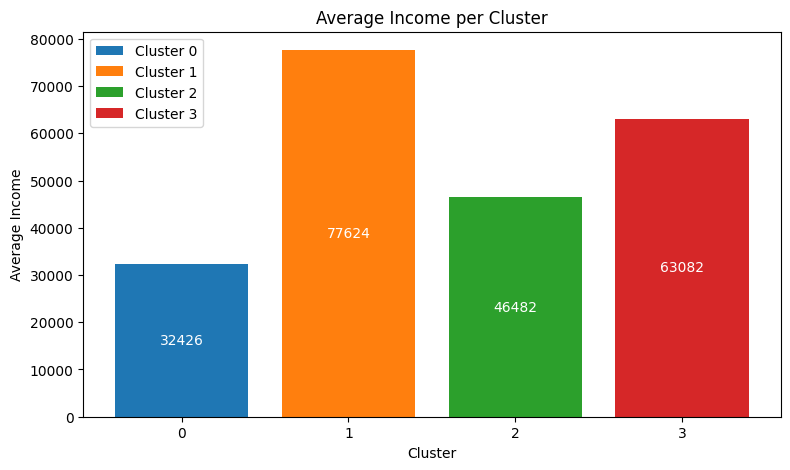

In [291]:
cluster_profile(profile_mean, 'Income')

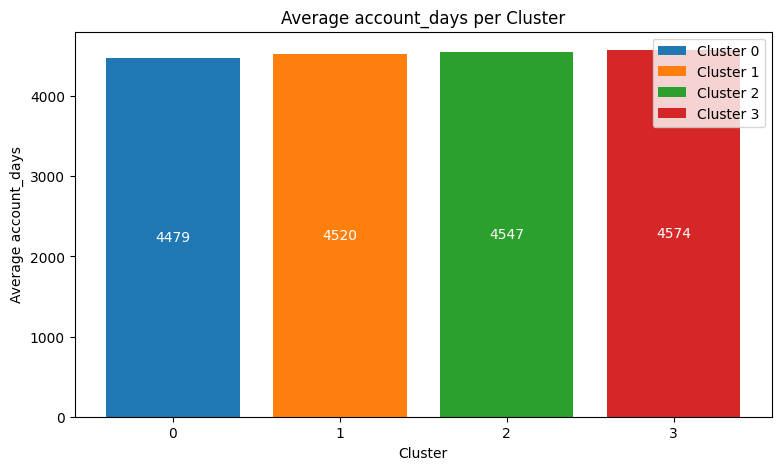

In [292]:
cluster_profile(profile_mean, 'account_days')